In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# For better plots
sns.set(style="whitegrid")

print("All libraries imported successfully")


All libraries imported successfully


In [9]:
df = pd.read_excel("data/Sleep_vs_ScreenTime_Project_Data.xlsx")
df.head()

,Screen_Time_Hours,Age,Physical_Activity_Min,Caffeine_Intake,Sleep_Quality_Score
0,6.75,19,94,2,77.04
1,1.92,52,11,4,83.06
2,4.80,19,11,1,80.19
3,6.05,59,89,4,78.00
4,4.78,46,75,2,81.79


In [10]:
df.shape


(500, 5)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Screen_Time_Hours      500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Physical_Activity_Min  500 non-null    int64  
 3   Caffeine_Intake        500 non-null    int64  
 4   Sleep_Quality_Score    500 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


In [12]:
df.describe()


,Screen_Time_Hours,Age,Physical_Activity_Min,Caffeine_Intake,Sleep_Quality_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.612620,40.068000,59.264000,2.508000,75.515980
std,2.415834,12.654471,34.491879,1.708735,12.741044
min,1.020000,18.000000,0.000000,0.000000,41.420000
25%,3.792500,28.750000,29.000000,1.000000,66.330000
50%,5.490000,41.000000,58.000000,2.000000,76.130000
75%,7.570000,51.000000,89.000000,4.000000,83.850000
max,10.000000,60.000000,120.000000,5.000000,106.390000


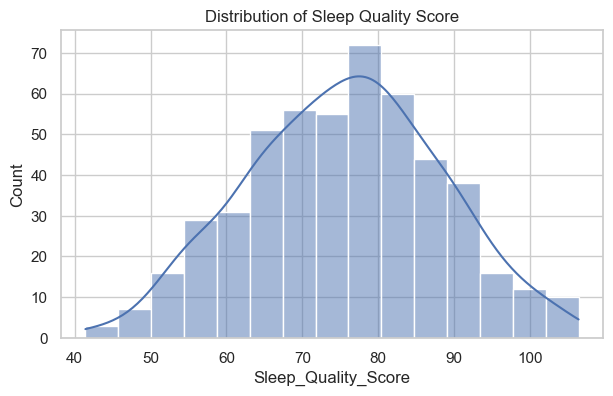

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(df["Sleep_Quality_Score"], kde=True)
plt.title("Distribution of Sleep Quality Score")
plt.show()


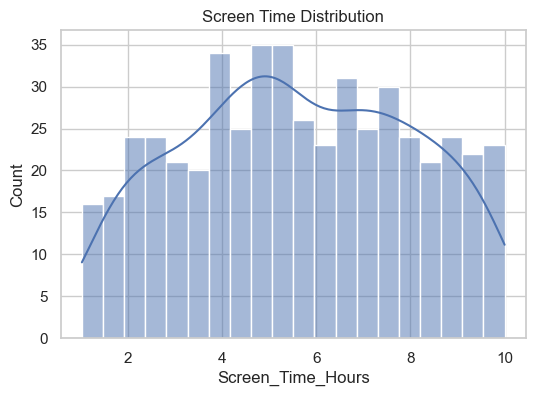

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["Screen_Time_Hours"], bins=20, kde=True)
plt.title("Screen Time Distribution")
plt.show()


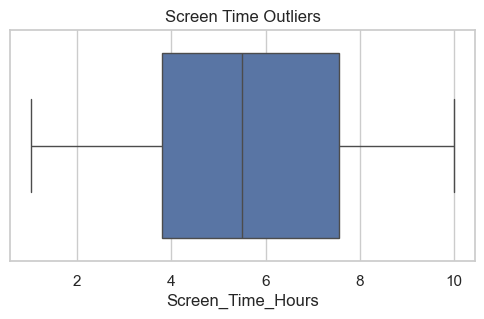

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Screen_Time_Hours"])
plt.title("Screen Time Outliers")
plt.show()


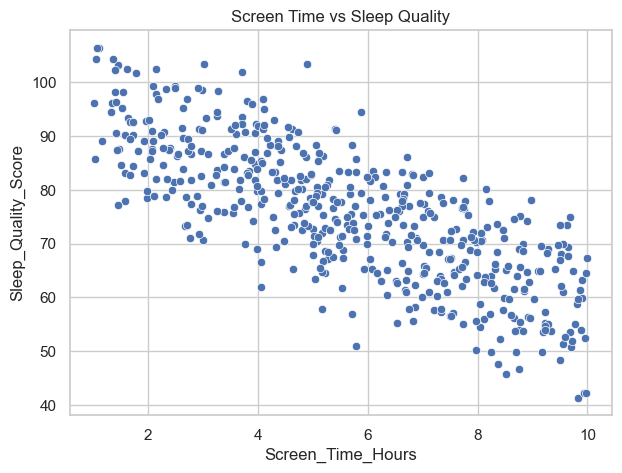

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Screen_Time_Hours",
    y="Sleep_Quality_Score",
    data=df
)
plt.title("Screen Time vs Sleep Quality")
plt.show()


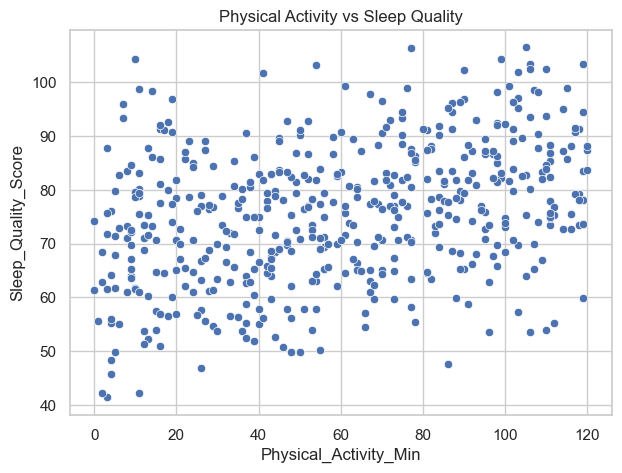

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Physical_Activity_Min",
    y="Sleep_Quality_Score",
    data=df
)
plt.title("Physical Activity vs Sleep Quality")
plt.show()


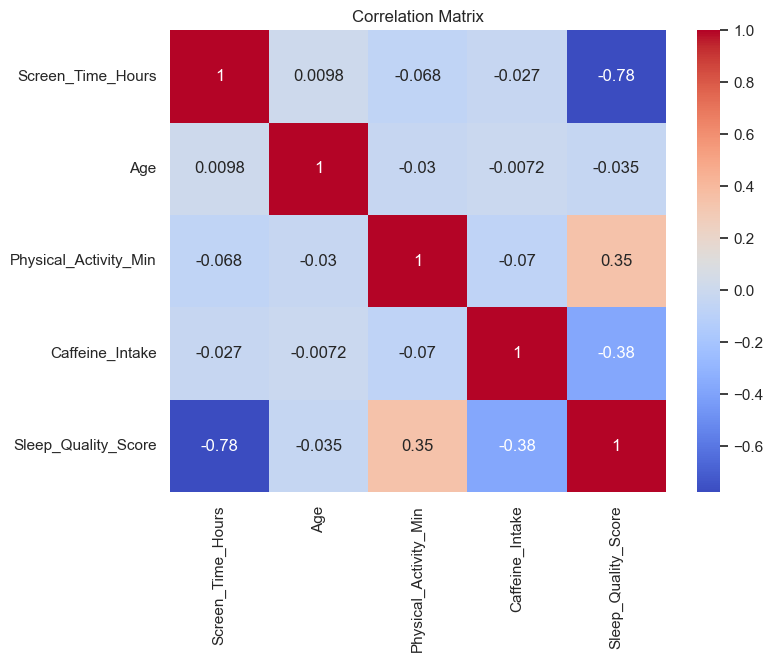

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


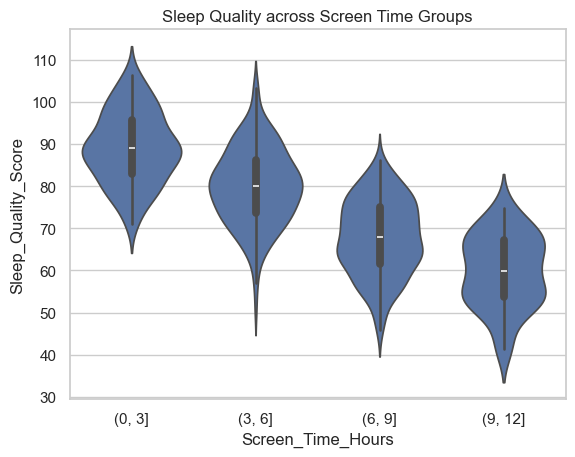

In [19]:
sns.violinplot(
    x=pd.cut(df["Screen_Time_Hours"], bins=[0,3,6,9,12]),
    y=df["Sleep_Quality_Score"]
)
plt.title("Sleep Quality across Screen Time Groups")
plt.show()


In [20]:
df.columns


Index(['Screen_Time_Hours', 'Age', 'Physical_Activity_Min', 'Caffeine_Intake',
       'Sleep_Quality_Score'],
      dtype='object')

In [21]:
df["Screen_Time_Category"] = pd.cut(
    df["Screen_Time_Hours"],
    bins=[0, 3, 6, 9, 12],
    labels=["Low", "Medium", "High", "Very High"]
)


In [22]:
df["Activity_Level"] = pd.cut(
    df["Physical_Activity_Min"],
    bins=[-1, 30, 60, 120],
    labels=["Low", "Moderate", "High"]
)


In [23]:
df["High_Caffeine"] = df["Caffeine_Intake"].apply(
    lambda x: 1 if x >= 3 else 0
)


In [24]:
df["Screen_Activity_Ratio"] = (
    df["Screen_Time_Hours"] / (df["Physical_Activity_Min"] + 1)
)


In [25]:
df_encoded = pd.get_dummies(
    df,
    columns=["Screen_Time_Category", "Activity_Level"],
    drop_first=True
)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = [
    "Screen_Time_Hours",
    "Age",
    "Physical_Activity_Min",
    "Caffeine_Intake",
    "Screen_Activity_Ratio"
]

df_encoded[num_cols] = scaler.fit_transform(
    df_encoded[num_cols]
)


In [27]:
df_encoded.head()


,Screen_Time_Hours,Age,Physical_Activity_Min,Caffeine_Intake,Sleep_Quality_Score,High_Caffeine,Screen_Activity_Ratio,Screen_Time_Category_Medium,Screen_Time_Category_High,Screen_Time_Category_Very High,Activity_Level_Moderate,Activity_Level_High
0,0.471274,-1.666533,1.008086,-0.297594,77.04,0,-0.272029,False,True,False,False,True
1,-1.530038,0.943852,-1.400687,0.874035,83.06,1,-0.121929,False,False,False,False,False
2,-0.336709,-1.666533,-1.400687,-0.883408,80.19,0,0.283074,True,False,False,False,False
3,0.181229,1.497570,0.862979,0.874035,78.00,1,-0.278493,False,True,False,False,True
4,-0.344996,0.469237,0.456680,-0.297594,81.79,0,-0.285795,True,False,False,False,True


In [28]:
X = df_encoded.drop("Sleep_Quality_Score", axis=1)
y = df_encoded["Sleep_Quality_Score"]


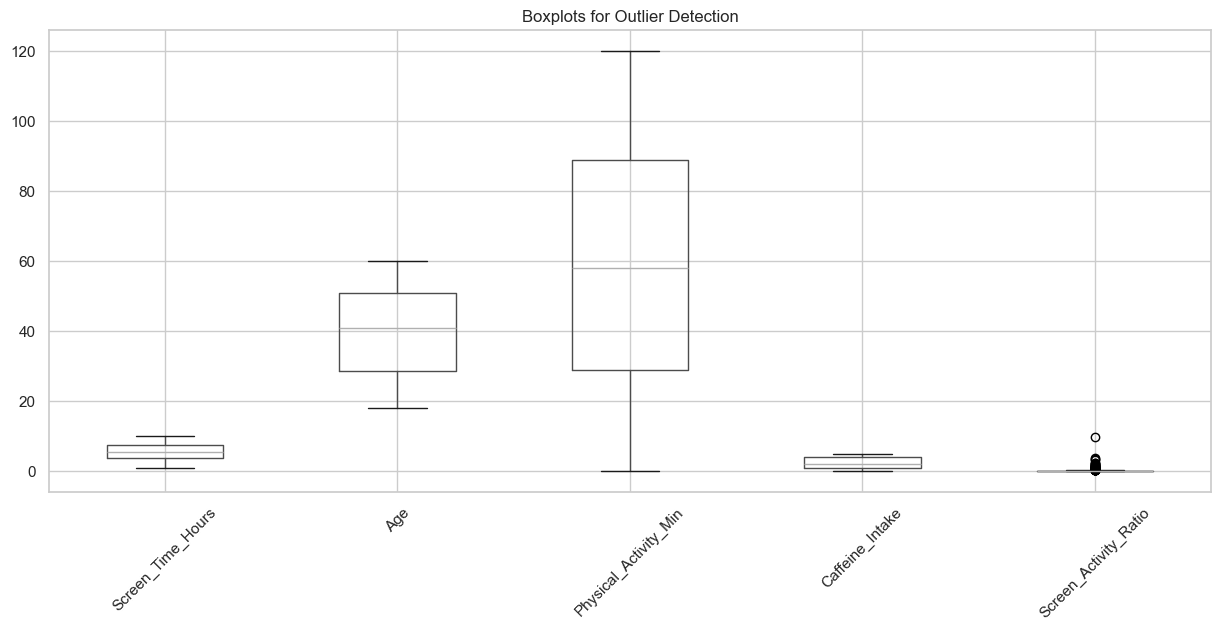

In [29]:
plt.figure(figsize=(15,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.show()


In [30]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


In [31]:
for col in num_cols:
    lower, upper = detect_outliers_iqr(df, col)
    print(col, "->", lower, upper)


Screen_Time_Hours -> -1.8737500000000007 13.236250000000002
Age -> -4.625 84.375
Physical_Activity_Min -> -61.0 179.0
Caffeine_Intake -> -3.5 8.5
Screen_Activity_Ratio -> -0.1460183306277056 0.38527766504329003


In [32]:
for col in num_cols:
    lower, upper = detect_outliers_iqr(df, col)
    print(col, "->", lower, upper)


Screen_Time_Hours -> -1.8737500000000007 13.236250000000002
Age -> -4.625 84.375
Physical_Activity_Min -> -61.0 179.0
Caffeine_Intake -> -3.5 8.5
Screen_Activity_Ratio -> -0.1460183306277056 0.38527766504329003


In [33]:
for col in num_cols:
    lower, upper = detect_outliers_iqr(df, col)
    df[col] = np.clip(df[col], lower, upper)


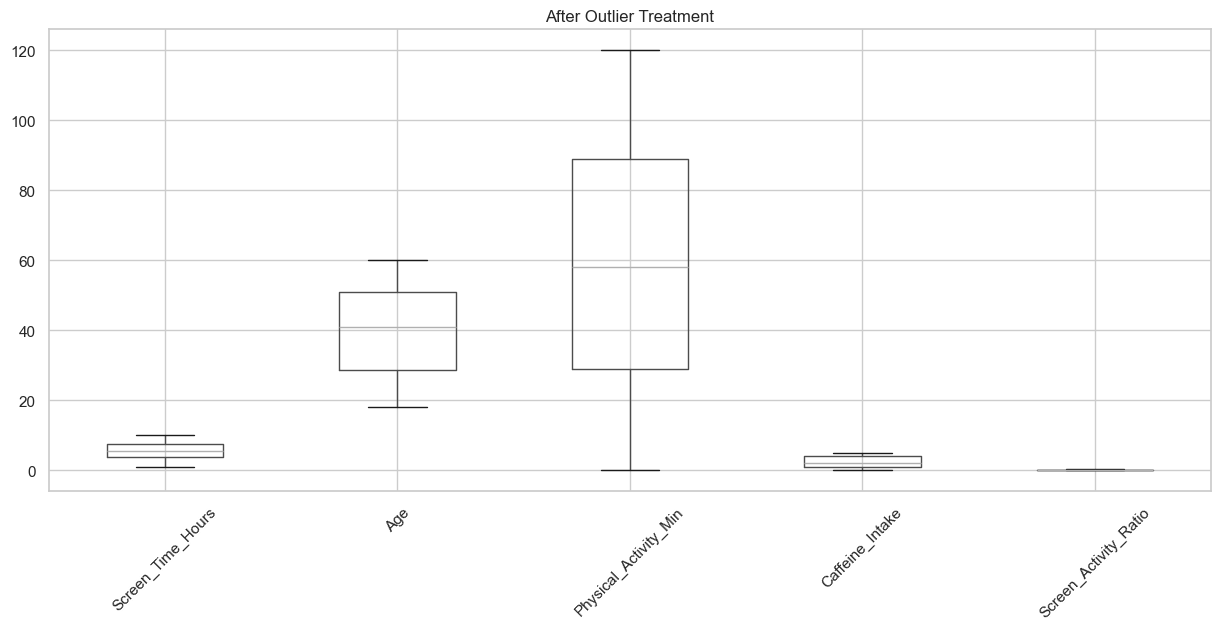

In [34]:
plt.figure(figsize=(15,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("After Outlier Treatment")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Sleep_Quality_Score", axis=1)
y = df_encoded["Sleep_Quality_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [38]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(y_true, y_pred, model_name):
    print(model_name)
    print("R²:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-"*30)

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression
R²: 0.8014518327452915
RMSE: 5.618362065426532
------------------------------
Random Forest
R²: 0.7651245342449845
RMSE: 6.110765372653818
------------------------------


In [39]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance


,Feature,Importance
0,Screen_Time_Hours,0.589934
5,Screen_Activity_Ratio,0.185881
3,Caffeine_Intake,0.117042
2,Physical_Activity_Min,0.039424
1,Age,0.035418
4,High_Caffeine,0.025386
9,Activity_Level_Moderate,0.002266
6,Screen_Time_Category_Medium,0.002211
10,Activity_Level_High,0.001264
7,Screen_Time_Category_High,0.000906


In [40]:
# using GridSearchCV(Hypermeter Tuning) to get better accuracy,low error,less overfitting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [41]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [42]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)


In [43]:
grid_search.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [44]:
grid_search.best_params_


{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [45]:
best_model = grid_search.best_estimator_


In [49]:
y_pred_best = best_model.predict(X_test)

print("Tuned R²:", r2_score(y_test, y_pred_best))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Tuned R²: 0.7750951423893544
Tuned RMSE: 5.979655989131078


In [52]:
# residual = actual - predicted, it says is model biased >, is relationship is linear
residuals = y_test - y_pred_best


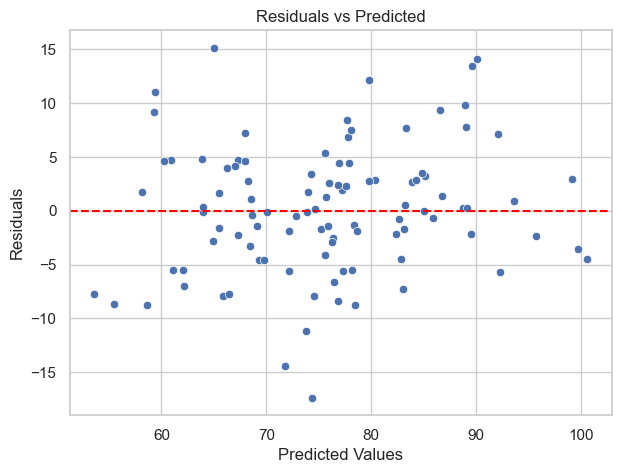

In [53]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


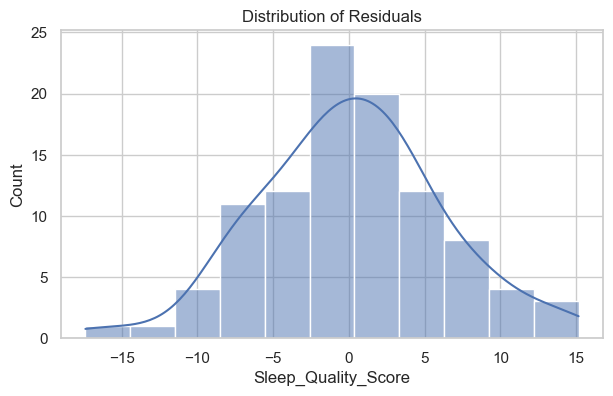

In [54]:
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


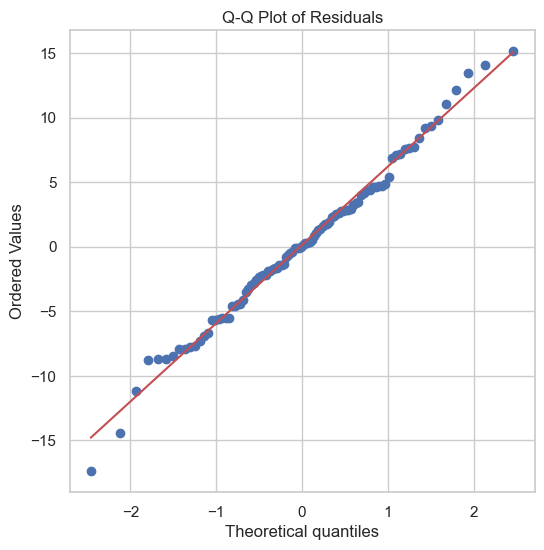

In [55]:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [56]:
import joblib
joblib.dump(best_model, "sleep_model.pkl")


['sleep_model.pkl']